# LangGraph에서 지원하는 다양한 Tool 살펴보기
## Reference :
1. LangGraph에서 지원하는 전체 Tool 목록 : https://python.langchain.com/docs/integrations/tools/
2. Python REPL : https://python.langchain.com/docs/integrations/tools/python/
3. Dall-E Image Generator : https://python.langchain.com/docs/integrations/tools/dalle_image_generator/
4. YouTube : https://python.langchain.com/docs/integrations/tools/youtube/

In [1]:
!pip install langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core duckduckgo-search langchain-community chromadb opencv-python scikit-image youtube_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.5 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 625.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 2.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import dotenv
dotenv.load_dotenv()

True

# Python REPL
복잡한 계산의 경우, LLM이 직접 답을 생성하는 것보다 LLM이 답을 계산하기 위한 코드를 생성하고, 그 코드를 실행하여 답을 얻는 것이 효과적일 수 있다.
이를 쉽게 수행할 수 있도록 Python REPL을 제공함

이 인터페이스는 출력된 내용만 반환하므로, 답을 계산하려면 반드시 답을 출력하도록 작성해야함.

In [3]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

In [6]:
python_repl = PythonREPL()

In [7]:
python_repl.run("print(1+1)")

Python REPL can execute arbitrary code. Use with caution.


'2\n'

In [8]:
# You can create the tool to pass to an agent
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [9]:
python_repl.run("print(1+4)")

'5\n'

In [10]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

In [11]:
llm.invoke("한국의 5년치 GDP에 대한 가상의 데이터를 만들고 이를 시각화해줘")

AIMessage(content="가상의 한국 GDP 데이터를 생성하고 이를 시각화하는 방법을 설명하겠습니다. 아래는 5년치 가상의 GDP 데이터입니다.\n\n### 가상의 한국 GDP 데이터 (단위: 조 원)\n\n| 연도 | GDP (조 원) |\n|------|-------------|\n| 2019 | 1,800       |\n| 2020 | 1,750       |\n| 2021 | 1,900       |\n| 2022 | 2,000       |\n| 2023 | 2,100       |\n\n이 데이터를 바탕으로 시각화를 위해 Python의 Matplotlib 라이브러리를 사용할 수 있습니다. 아래는 해당 데이터를 시각화하는 코드 예시입니다.\n\n```python\nimport matplotlib.pyplot as plt\n\n# 가상의 데이터\nyears = [2019, 2020, 2021, 2022, 2023]\ngdp = [1800, 1750, 1900, 2000, 2100]\n\n# 시각화\nplt.figure(figsize=(10, 6))\nplt.plot(years, gdp, marker='o', linestyle='-', color='b')\nplt.title('가상의 한국 GDP 변화 (2019-2023)', fontsize=16)\nplt.xlabel('연도', fontsize=14)\nplt.ylabel('GDP (조 원)', fontsize=14)\nplt.xticks(years)\nplt.grid(True)\nplt.ylim(1700, 2200)\nplt.show()\n```\n\n위 코드를 실행하면 2019년부터 2023년까지의 가상의 한국 GDP 변화를 나타내는 선 그래프가 생성됩니다. 이 그래프는 각 연도의 GDP 변화를 시각적으로 보여줍니다. \n\n이와 같은 방식으로 데이터를 생성하고 시각화할 수 있습니다. 필요에 따라 데이터나 시각화 스타일을 조정할 수 있습니다.", additional_kwargs={'refu

In [12]:
tools = [repl_tool]

In [13]:
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

In [14]:
from langchain import hub

# Fetches the latest version of this prompt
prompt = hub.pull("wfh/langsmith-agent-prompt:5d466cbc")
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant.

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [15]:
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

runnable_agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

agent_executor = AgentExecutor(
    agent=runnable_agent, tools=tools, handle_parsing_errors=True
)

Matplotlib is building the font cache; this may take a moment.
/Users/kimdonghyeon/Library/Caches/pypoetry/virtualenvs/ai-agent-W5GxBq27-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyeon/Library/Caches/pypoetry/virtualenvs/ai-agent-W5GxBq27-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyeon/Library/Caches/pypoetry/virtualenvs/ai-agent-W5GxBq27-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdonghyeon/Library/Caches/pypoetry/virtualenvs/ai-agent-W5GxBq27-py3.12/lib/python3.12/site-packages/IPython/core/pylabto

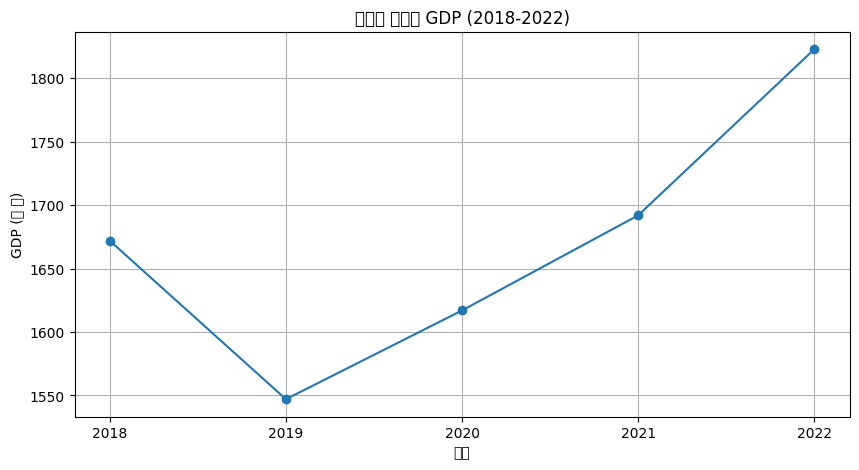

{'input': '한국의 5년치 GDP에 대한 가상의 데이터를 만들고 이를 시각화해줘',
 'output': '가상의 한국의 GDP 데이터(2018-2022년)를 생성하고 시각화한 결과입니다. 각 연도에 대한 GDP 값은 무작위로 생성되었습니다. \n\n![한국의 가상의 GDP (2018-2022)](attachment://gdp_plot.png)\n\n이 그래프는 각 연도의 GDP 변화를 보여줍니다.'}

In [16]:
results = agent_executor.invoke({"input":"한국의 5년치 GDP에 대한 가상의 데이터를 만들고 이를 시각화해줘"})
results

# Youtube

YouTube Search ( https://github.com/joetats/youtube_search ) 패키지는 YouTube의 강력한 속도 제한이 걸린 API를 사용하지 않고 YouTube 동영상을 검색할 수 있는 도구입니다.

이 패키지는 YouTube 홈페이지의 검색 양식을 활용하고, 검색 결과 페이지를 스크레이핑하여 동영상을 검색합니다.

이 노트북은 YouTube를 검색하는 도구를 사용하는 방법을 보여줍니다.

출처: https://github.com/venuv/langchain_yt_tools

In [18]:
from langchain_community.tools import YouTubeSearchTool

In [19]:
tool = YouTubeSearchTool()

In [20]:
tool.run("백종원")

"['https://www.youtube.com/shorts/FsvYJ0YHZAE', 'https://www.youtube.com/watch?v=3VEVwnMiriw&pp=ygUJ67Cx7KKF7JuQ']"

In [21]:
tool.run("백종원,5")

"['https://www.youtube.com/shorts/FsvYJ0YHZAE', 'https://www.youtube.com/watch?v=3VEVwnMiriw&pp=ygUJ67Cx7KKF7JuQ', 'https://www.youtube.com/shorts/QsgwJYR6DjE', 'https://www.youtube.com/watch?v=t8EBDJa-X5Q&pp=ygUJ67Cx7KKF7JuQ0gcJCYQJAYcqIYzv', 'https://www.youtube.com/watch?v=EPBK7ZS6LwA&pp=ygUJ67Cx7KKF7JuQ']"

In [22]:
tools = [tool]

In [23]:
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

In [24]:
from langchain import hub

# Fetches the latest version of this prompt
prompt = hub.pull("wfh/langsmith-agent-prompt:5d466cbc")
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant.

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [25]:
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

runnable_agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

agent_executor = AgentExecutor(
    agent=runnable_agent, tools=tools, handle_parsing_errors=True
)

In [26]:
results = agent_executor.invoke({"input":"백종원의 김치찌개 레시피에 관련된 유튜브 동영상을 찾아줘"})
results

{'input': '백종원의 김치찌개 레시피에 관련된 유튜브 동영상을 찾아줘',
 'output': '다음은 백종원의 김치찌개 레시피에 관련된 유튜브 동영상입니다:\n\n1. [백종원 김치찌개 레시피 동영상 1](https://www.youtube.com/watch?v=qWbHSOplcvY&pp=ygUg67Cx7KKF7JuQIOq5gOy5mOywjOqwnCDroIjsi5ztlLw%3D)\n2. [백종원 김치찌개 레시피 동영상 2](https://www.youtube.com/watch?v=DnQ09ZZCjCs&pp=ygUg67Cx7KKF7JuQIOq5gOy5mOywjOqwnCDroIjsi5ztlLw%3D)\n\n이 동영상들을 통해 김치찌개 레시피를 확인해 보세요!'}